# Dead Tree Mapping

Purpose:        This Script is written as a final project for the Spatial Python course (Eagle master                    programm, teacher Steven Hill)
            
Author:        Reagan Okoth, Nora Nieskens 

Field data:      Tree species identity and their cover on each plot for research extent in Marktheidenfeld (August 2021), Dead tree sampling                      (Source: Mapping campaign by the authors)
                 
Satellite data : 4-Band Planet data, aquisitions in May and September of the years 2018, 2019, 2020, 2021 (Planet Team (2021). Planet Application Program Interface: In Space for Life on Earth. San Francisco, CA. https://api.planet.com); 


Output         : Spatial predicition of dead trees, change detection 

### Problem Rationel

Forest ecosystems are known to provide important ecosystem services including water and air purification. While they play a key role in climate change mitigation as carbon sinks, forests are similarly, very sensitive to the poresent ongoing global climate warming [$^{1}$](https://www.sciencedirect.com/science/article/pii/S0378112710007140?casa_token=eVchPGEdax8AAAAA:IivvV6JwDaHCyOWAAaP724OtaWGStEbTzXcZh-xYFVlYYtZzLnzxzaSkfUuBUdLSD8FtBm1mEpk). During the month of April 2018, a high-pressure system established over Central Europe and lasted almost consistently until mid of October. This resulted in a long-lasting drought spell and record temperatures in central and northern Europe. The impacts of the drought event included deminished ecosystem health especially in forested areas[$^{2}$](https://bg.copernicus.org/preprints/bg-2019-286/bg-2019-286.pdf). In Germany, the warm conditions resulted in Pests such as bark beetle proliferation. As such, the pests' population dramatically escalated to a point they bacame a threat to the foreat ecosystem. As evidence, the Federal Statistical Office (Destatis) reported a record 32 million cubic meteres of timber harvested as a result of pest infestation in the year 2019. These numbers are way overboard when compred to the preceding years (11 and 6 million cubic metere in 2018 and 2017 respectively)[$^{3}$](https://www.destatis.de/EN/Press/2020/07/PE20_N041_412.html).

In this study, we quantify the impact of the 2018-2019 European drought event on forest health using high resolution satellite data in Marktheidenfeld - a small German municipality located along the Main river in the larger Main-Spessert (MSP) region.Our research focused on utilizing Optical Multi-spectral Remote Sensing Imagery (planet data) to descriminate dead trees in a forest ecosystem, estimate the proportion of the forest classified as dead tree, and Investigate the interanual differences in this proportion from 2018 to present. 



# Methods

### Procedure 

- Extract out the forest 

- Classify into  broad leaf vs needle 

- Vegetation health parameters  

- Detect dead tree 

- Investigate temporal changes (e.g. impact of the heat waves 2018, 2019)  

- Change maps in between one year; change maps between the years  

 

- Investigate differences of both forests (left side dead trees standing; right side cut down?) maybe temporal visible --> forest management  

- 2018, 2019, 2020, 2021 Get image from same month/s over 2018-2021 

MAYBE WE DO OUR WORKFLOW AS A GRAPHIC? (lets see in the end) 


First we imprort all necessary libaries 

In [1]:
#!pip install rasterio

In [2]:
#!pip install --upgrade earthpy

In [3]:
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import os
import glob
import earthpy.spatial as es
from rasterio.plot import reshape_as_raster, reshape_as_image
from sklearn.cluster import KMeans
from shapely.geometry import mapping
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image
import pandas as pd

In [4]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio 
from rasterio.plot import show
import earthpy.spatial as es
import earthpy.plot as ep

### Loading and visualizing the field data

Let's load the field data and have a look on it's structure

In [5]:
#Load the field data 
#import geopandas as gpd
field_data = gpd.read_file('../Data/Points_as_Polygon.shp')

#show attribute table 
field_data

,id,plot_ID,Oak,Beech,Dead,Pine,Logged,Esche,Eiche,Marple,...,Cherry,Dmnnt_S,Dmn_S_P,Frst_ty,Notes,crds_x1,crds_x2,class_name,class_id,geometry
0,2.0,F1P1,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Oak,62.500000,Broad_leaf,Undergrowth mostly Beech,542779.387446,5.520698e+06,forest,1,"POLYGON ((542768.387 5520708.575, 542790.387 5..."
1,3.0,F1P2,4.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,Beech,50.000000,Broad_leaf,"taller trees, Thick canopy, almost no undergrowth",542492.077924,5.520557e+06,forest,1,"POLYGON ((542481.078 5520567.837, 542503.078 5..."
2,4.0,F1P3,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Beech,80.000000,Broad_leaf,"Younger trees with less DBH , More understory ...",542601.449240,5.520402e+06,forest,1,"POLYGON ((542590.449 5520412.564, 542612.449 5..."
3,5.0,F1P4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Oak,100.000000,Broad_leaf,"No undergrowth, no understorey,more grass cove...",542334.141894,5.519783e+06,forest,1,"POLYGON ((542323.142 5519793.973, 542345.142 5..."
4,6.0,F1P5,0.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,...,0.0,Logged,64.705882,Dead,"Logged, mostly pine, ground cover mostly fern,...",542114.379803,5.519793e+06,forest,1,"POLYGON ((542103.380 5519803.835, 542125.380 5..."
5,8.0,F1P6,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Oak,83.333333,Broad_leaf,"little beech understory, groundcover mostly th...",542304.390447,5.519137e+06,forest,1,"POLYGON ((542293.390 5519147.719, 542315.390 5..."
6,9.0,F1P7,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Oak,50.000000,Broad_leaf,"A lot of understorey-mostly young beeches,some...",542962.847356,5.518468e+06,forest,1,"POLYGON ((542951.847 5518479.354, 542973.847 5..."
7,10.0,F1P8,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,Pine,100.000000,Needle_leaf,No understorey but very diverse undergrowth,541936.771128,5.519249e+06,forest,1,"POLYGON ((541925.771 5519259.828, 541947.771 5..."
8,12.0,F2P1,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Beech,100.000000,Broad_leaf,"steep slope, some understory-young beeches, gr...",542773.087331,5.517467e+06,forest,1,"POLYGON ((542762.087 5517477.725, 542784.087 5..."
9,13.0,F2P2,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Beech,85.714286,Broad_leaf,"No understorey,ground cover- springtraut and y...",542488.385648,5.517603e+06,forest,1,"POLYGON ((542477.386 5517614.314, 542499.386 5..."


Our next goal is to visualize the field data in an interactive leaflet. Therefore some preprocessing of the data is necessary as the data is needed as lat/long information. This is because leaflet maps have lat/lon as default projection and not meters. First we reduce the fielddata to the plot names and add an index.

In [6]:
point_names = field_data.plot_ID
index = list(range(len(point_names)))

name_df = pd.DataFrame(list(zip(list(index), list(point_names))),
                       columns =['index','Name'])



Then we load a csv file containing the coordinates in Latitude and Longitude format and not in meters as the shpFile (which is already projected). 

In [7]:
lat_lon_coord = pd.read_csv('../Data/Lat_Lon_coordinates.csv')

index_as_series = pd.Series (index)


We want to merge the two files based on the index, thus we create one for the latlong file as well:

In [8]:
lat_lon = lat_lon_coord.iloc[:, 1:3]
#print(lat_lon)

# concancatenate the lat lon with the index series
lat_lon_with_index = pd.concat([index_as_series,lat_lon], axis=1)
lat_lon_with_index.columns = ['index','Lat', 'Lon']

Finally, we merge the two dataframes i.e the point names and the lat/lon coordinates based on the index column

In [9]:
new_coord_df = pd.merge(name_df, lat_lon_with_index, on="index")
new_coord_df

,index,Name,Lat,Lon
0,0,F1P1,9.594913,49.837180
1,1,F1P2,9.590903,49.835934
2,2,F1P3,9.592406,49.834530
3,3,F1P4,9.588622,49.828985
4,4,F1P5,9.585568,49.829090
5,5,F1P6,9.588138,49.823175
6,6,F1P7,9.597218,49.817117
7,7,F1P8,9.583039,49.824209
8,8,F2P1,9.594470,49.808122
9,9,F2P2,9.590528,49.809371


In [10]:
from ipyleaflet import Map, Marker,basemaps
center = (new_coord_df.iloc[1,3],new_coord_df.iloc[1,2])
sampling_points = Map(center=center, zoom=13)

for (index, row) in new_coord_df.iterrows():
    marker = Marker(location=[row.loc['Lon'], row.loc['Lat']], 
                       title=row.loc['Name'])
    sampling_points.add_layer(marker)
    
sampling_points

Map(center=[49.8359342934198, 9.59090263783977], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

## Loading and preprocessing the satellite data

Next, we have a first look on our satellite data. 

The following function filters tif files within the directory, load and stack each imagery and returns a nupy ndArray. 
Each image is nested in a list, therefore the list is n images long (lenght of the list depend on number of images stacked)
Each image is a 3D array with the following format [x,y,bands]. To index band one for each image for example, one would:
first index the image of interst from the list i.e list[0] for the first image
and then index the first band like this list[0][:,:, 1]


In [11]:
def stackRaster(path, raster_extension):
    rasterStack = []
    files = os.listdir(path)
    pattern = re.sub("\.", ".*", raster_extension) + '$'
    filtered = [i for i in files if re.match(pattern, i)]
    
    for file in filtered:
        new_path = os.path.abspath(os.path.join(path, file))
        if os.path.exists(path):
          with rasterio.open(new_path) as src:
            blue, green, red, nir = src.read()
            stack = np.dstack([blue, green, red, nir])
            rasterStack.append(stack)
    return(rasterStack)
                                   

In [12]:
# Can we delete this cell???


#path = '../Planet_data/'

#rasterStack = []
#files = os.listdir(path)
#pattern = re.sub("\.", ".*", '.tif') + '$'
#filtered = [i for i in files if re.match(pattern, i)]
#filtered

Let's apply the function and have a look on one of the bands

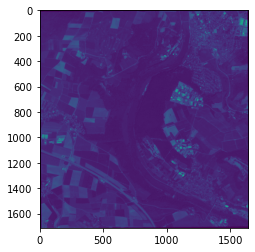

<AxesSubplot:>

In [13]:
path = '../Planet_data/'
Rasterstack = stackRaster(path, '.tif')

# plot the first band of the first image like this
show(Rasterstack[0][:,:,0])


To work with our satellite data we need to convert the PlanetScope imagery from Radiance to Reflectance. Therefore we need to extract the coefficients stored in the metadata (xml file). 

To make our life easier we write a function to filters files in a directory based on a prefered file format (extention).
The function is based on the regrex library and returns a list of all the files meeting the prefred extention.


In [14]:
import re

def fileFilter(path, pattern):
    files = os.listdir(path)
    new_pattern = re.sub("\.", ".*", pattern) + '$'
    filtered = [i for i in files if re.match(new_pattern, i)]
    return(filtered)


Now we can filter for the tif and the xml files in our directory.

In [15]:
path = '../Planet_data/'

tif_list =  fileFilter(path, '.tif')
xml_list = fileFilter(path, '.xml')
tif_list
#xml_list
#tif_list

['Marktheidenfeld_Planet_20180521.tif',
 'Marktheidenfeld_Planet_20180927.tif',
 'Marktheidenfeld_Planet_20190524.tif',
 'Marktheidenfeld_Planet_20190922.tif',
 'Marktheidenfeld_Planet_20200518.tif',
 'Marktheidenfeld_Planet_20200921.tif',
 'Marktheidenfeld_Planet_20210531.tif',
 'Marktheidenfeld_Planet_20210904.tif']

This function extracts the coeeficients from each image and each band and returns a list of dictionaries. Each dictionary in a list is treated as image. Each dictionary (image) has keys ranging from 1 to 4 corresponding to the Planet data bands which is in the order of BGRN (1=B and 4=N ). 

Key values are the coefficients for indvidual bands that can be used to transform the band from radiance to reflectance
the function takes the path where the files are located and a pattern which corresponds to the file format/extention 
to be filtrered from the list of files.

In [16]:
from xml.dom import minidom

def getCOEFs(path,pattern ):
    coefs = []
    xml_files = fileFilter(path, pattern)
    for file in xml_files:
        xmldoc = minidom.parse(os.path.join(path, file))
        nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")
        coef_value = {}
        for node in nodes:
            bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
            if bn in ['1', '2', '3', '4']:
                i = int(bn)
                value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
                coef_value[i] = float(value)
        coefs.append(coef_value)
    return(coefs)       
    

Here, we get the coefficients and store them in the coefficients object as a list of dictionaries.

In [17]:
coefficients = getCOEFs(path, '.xml')

Now we can convert all bands of each image to TOA.

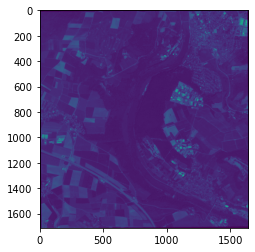

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [18]:
def stackRaster_TOA(path, raster_extension, coef_list):
    rasterStack = []
    files = os.listdir(path)
    pattern = re.sub("\.", ".*", raster_extension) + '$'
    filtered = [i for i in files if re.match(pattern, i)]
    
    for file in filtered:
        i=0
        new_path = os.path.abspath(os.path.join(path, file))
        if os.path.exists(path):
          with rasterio.open(new_path) as src:
            blue, green, red, nir = src.read()
            
                        
            blue_coef = list(coef_list[i].values())[0]
            green_coef = list(coef_list[i].values())[1]
            red_coef = list(coef_list[i].values())[2]
            nir_coef = list(coef_list[i].values())[3]
            i=i+1
                
            blue_ref = blue*blue_coef
            green_ref = green*green_coef   
            red_ref = red*red_coef 
            nir_ref = nir*nir_coef
            
            stack = np.dstack([blue_ref, green_ref, red_ref, nir_ref])
            rasterStack.append(stack)
    return(rasterStack)
                         
        
TOAstack = stackRaster_TOA(path, ".tif", coefficients)

#print the blue band of the first image
show(TOAstack[0][:,:,0])
TOAstack[0]


### Get additional features of our images 

We calculate the NDVI for each image and safe it as additional band in one stack. 

In [19]:
def ndvi_CALC(stack_list):
    ndvi_stack=[]
    for i in range(len(stack_list)):
        red = stack_list[i][:,:,2]
        nir = stack_list[i][:,:,3]
        
        ndvi = (nir.astype(float) - red.astype(float)) / (nir.astype(float) + red.astype(float))
        stacked = np.dstack([stack_list[i][:,:,0:4], ndvi])
        ndvi_stack.append(stacked)
        
    return(ndvi_stack)     
                

C:\Users\noran\anaconda3\envs\env_vers3_7\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


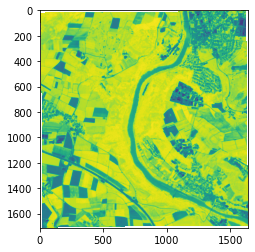

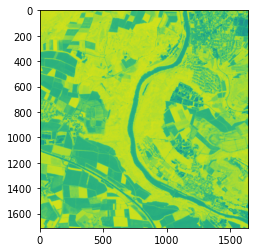

<AxesSubplot:>

In [21]:
ndvi_stack = ndvi_CALC(TOAstack)
type(ndvi_stack)
ndvi_stack[0].shape
#len(x)
#t =ndvi_stack[0][:,:,0:2]
#t.shape



Populating the interactive namespace from numpy and matplotlib


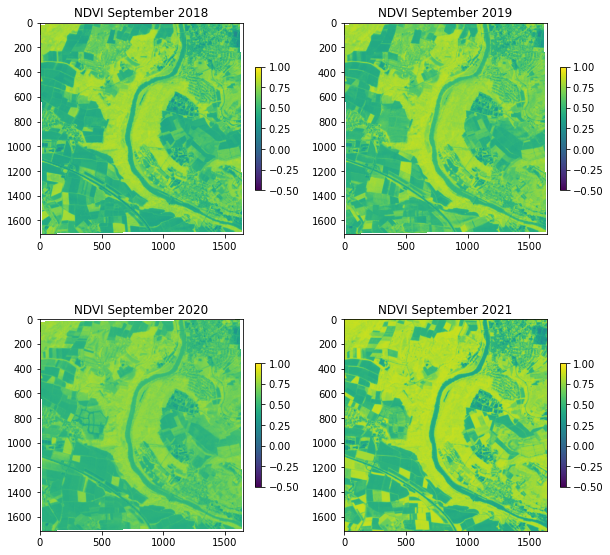

In [61]:
# 
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

# printing the NDVI bands
# show(ndvi_stack[1][:,:,4],  ax=ax1)
# show(ndvi_stack[3][:,:,4],  ax=ax2)
# show(ndvi_stack[5][:,:,4],  ax=ax3)
# show(ndvi_stack[7][:,:,4], ax=ax4)

# print("Normalized bands")
# redn= ndvi_stack[1][:,:,4]
# #redn.min()
# print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
# # print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
# # print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())



import scipy
import scipy.ndimage
%pylab inline


plt.subplot(221)
imshow(ndvi_stack[1][:,:,4],vmin=-0.5, vmax=1)
title('NDVI September 2018')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)

plt.subplot(222)
imshow(ndvi_stack[3][:,:,4], vmin=-0.5, vmax=1)
title('NDVI September 2019')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)

plt.subplot(223)
imshow(ndvi_stack[5][:,:,4], vmin=-0.5, vmax=1)
title('NDVI September 2020')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)

plt.subplot(224)
imshow(ndvi_stack[7][:,:,4], vmin=-0.5, vmax=1)
title('NDVI September 2021')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)




plt.show()


In this part, we conduct a texture analysis of each scene to create texture features that help classify pixels as forest or non-forest. The texture analysis is performed with a single band. For simplicity, we focus here on the green band that responds to forest/non-forest[SOURCE??].

In [64]:
from skimage import feature, filters

def get_texture_features(stack_list):
    feature_stack=[]
    for i in range(len(stack_list)):
        band = stack_list[i][:,:,1]
        edges1 = np.ma.array(feature.canny(band, low_threshold=0.0, high_threshold=0.01,sigma=2))
        blurred = np.ma.array(filters.gaussian(edges1, sigma=2))
        blurred2 = np.ma.array(filters.gaussian(edges1, sigma=6))
        stack = np.dstack([stack_list[i][:,:,0:5],edges1, blurred, blurred2])
        feature_stack.append(stack)
    return(feature_stack)

feat_stack = get_texture_features(ndvi_stack)


Our image stacks have now 8 bands: B, G, R, NIR, NDVI, edges1, blurred, blurred2

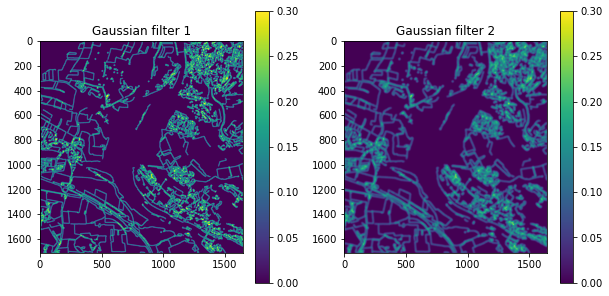

In [84]:
#type(feat_stack)
#feat_stack[0].shape
#len(feat_stack)

plt.subplot(121)
imshow(feat_stack[7][:,:,6], vmin=0, vmax=0.3)
title('Gaussian filter 1')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)

plt.subplot(122)
imshow(feat_stack[7][:,:,7], vmin=0, vmax=0.3)
title('Gaussian filter 2')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)



# visualising the blurred 2 image of our first image stack
#show(feat_stack[0][:,:,1])


### Forest/ Non-Forest classification



Lets write a function to stack images from one year together! We now that our list is structured as 2 images from one year. 
We loop over the stack list and add the bands of the current image and the next one together. Then we select only the right stacks which represent one year.


In [ ]:
def make_yearly_stacks(stack_list):
    feature_stack=[]
    for i in range(len(stack_list)-1):
        stack = stack_list[i] 
        stack = np.dstack([stack_list[i], stack_list[i+1]])
        
        feature_stack.append(stack)
    return([feature_stack[0],feature_stack[2], feature_stack[4],feature_stack[6]])

feat_stack = make_yearly_stacks(feat_stack)
 
len(feat_stack)


In [ ]:
show(feat_stack[1][:,:,15])

To get a feeling for our study area we do a first Kmeans prediction.

In [ ]:
## Here we need to classify our image stack list and not a single raw image 

rpath = new_path

with rasterio.open(rpath) as src:
    landsat_stack = img = src.read()
    bands = src.count
    crs = src.crs
    
bands, rows, cols = landsat_stack.shape
landsat_stack.shape

reshaped_img = reshape_as_image(landsat_stack)
reshaped_img.reshape(-1, bands).shape

num_classes = 2
kmeans_predictions = KMeans(n_clusters=num_classes, random_state=0).fit(reshaped_img.reshape(-1, bands))
kmeans_predictions_2d = kmeans_predictions.labels_.reshape(rows, cols)

def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors

fig, axs = plt.subplots(1,2,figsize=(15,8))

img_stretched = color_stretch(reshaped_img, [2, 1, 0])
axs[0].imshow(img_stretched)
axs[1].imshow(kmeans_predictions_2d, interpolation='none')



Well, that didnt not turn out so good. So let's rather perform a supervised classification!

First, we gather our training data. We have one shapefile with forest polygons and one with none forest polygons. We concat both shapefiles together

In [ ]:
# Load "non forest" training data
train_data_mask = gpd.read_file('../Data/training_data_forestmask.shp')
train_data_mask

#Concat both shapefiles together. 
forest_train = gpd.GeoDataFrame(pd.concat([field_data, train_data_mask], 
                        ignore_index=True), crs=field_data.crs)

forest_train.geometry.plot()



In [ ]:
from osgeo import gdal
file = tif_list[1]
new_path = os.path.abspath(os.path.join(path, file))


In [ ]:
forest_nforest = forest_train.iloc[:, -3:]
forest_nforest


In [ ]:
forest_nforest=forest_nforest.rename(columns={"class_name": "class", "class_id": "id"})

# reorder the colunms to start with id the class
forest_nforest = forest_nforest[['id','class','geometry']]

In [ ]:
# replace the value of no fores to 2
# this is because nodata is treated as 0
forest_nforest= forest_nforest.replace(to_replace=0, value= 2, regex=True)
forest_nforest.to_file('../Data/forest_nforest_reorder.shp')


In [ ]:
from osgeo import ogr
# Open the dataset from the file
dataset = ogr.Open('../Data/forest_nforest_reorder.shp')
# Make sure the dataset exists -- it would be None if we couldn't open it
if not dataset:
    print('Error: could not open dataset')
dataset

In [ ]:
### Let's get the driver from this file
driver = dataset.GetDriver()
print('Dataset driver is: {n}\n'.format(n=driver.name))

### How many layers are contained in this Shapefile?
layer_count = dataset.GetLayerCount()
print('The shapefile has {n} layer(s)\n'.format(n=layer_count))

### What is the name of the 1 layer?
layer = dataset.GetLayerByIndex(0)
print('The layer is named: {n}\n'.format(n=layer.GetName()))

### What is the layer's geometry? is it a point? a polyline? a polygon?
# First read in the geometry - but this is the enumerated type's value
geometry = layer.GetGeomType()

# So we need to translate it to the name of the enum
geometry_name = ogr.GeometryTypeToName(geometry)
print("The layer's geometry is: {geom}\n".format(geom=geometry_name))

### What is the layer's projection?
# Get the spatial reference
spatial_ref = layer.GetSpatialRef()

# Export this spatial reference to something we can read... like the Proj4
proj4 = spatial_ref.ExportToProj4()
print('Layer projection is: {proj4}\n'.format(proj4=proj4))

### How many features are in the layer?
feature_count = layer.GetFeatureCount()
print('Layer has {n} features\n'.format(n=feature_count))

### How many fields are in the shapefile, and what are their names?
# First we need to capture the layer definition
defn = layer.GetLayerDefn()

# How many fields
field_count = defn.GetFieldCount()
print('Layer has {n} fields'.format(n=field_count))

# What are their names?
print('Their names are: ')
for i in range(field_count):
    field_defn = defn.GetFieldDefn(i)
    print('\t{name} - {datatype}'.format(name=field_defn.GetName(),
                                         datatype=field_defn.GetTypeName()))

In [ ]:
# open a single raster image and get the shape nrows and ncol.
# this data will be usewd to rasterize the training data
# assumption: all the raster images  from planet data that are used in this work have same extent

raster = gdal.Open(new_path)
ncol = raster.RasterXSize
nrow = raster.RasterYSize

# Fetch projection and extent
proj = raster.GetProjectionRef()
ext = raster.GetGeoTransform()

raster = None

# Define the directory where to write the rasterized training samples
new_file_name = '../Intermediate_Results/forest_nforest_tainRaster_data.gtif'
save_path = os.path.abspath(os.path.join(path, new_file_name))

In [ ]:
# Create the raster save the raster in the directory defined in the aabove cell
memory_driver = gdal.GetDriverByName('GTiff')
out_raster_ds = memory_driver.Create(save_path, ncol, nrow, 1, gdal.GDT_Byte)
out_raster_ds


# Set the training raster file projection and extent to the that of the planet images
out_raster_ds.SetProjection(proj)
out_raster_ds.SetGeoTransform(ext)


# Fill our output band with the 0 blank, no class label, value
#b = out_raster_ds.GetRasterBand(1)
#b.Fill(0)

# Rasterize the shapefile layer to our new dataset
status = gdal.RasterizeLayer(out_raster_ds,  # output to our new dataset
                             [1],  # output to our new dataset's first band
                             layer,  # rasterize this layer
                             None, None,  # don't worry about transformations since we're in same projection
                             [0],  # burn value 0
                             ['ALL_TOUCHED=TRUE',  # rasterize all pixels touched by polygons
                              'ATTRIBUTE=id']  # put raster values according to the 'id' field values
                             )

# Close dataset
out_raster_ds = None

if status != 0:
    print("I don't think it worked...")
else:
    print("Success")

In [ ]:
# Import NumPy for some statistics
import numpy as np

forest_nforest_raster = gdal.Open(save_path, gdal.GA_ReadOnly)

forest_nforest_raster2 = forest_nforest_raster.GetRasterBand(1).ReadAsArray()

# How many pixels are in each class?
classes = np.unique(forest_nforest_raster2)
# Iterate over all class labels in the ROI image, printing out some information
for c in classes:
    print('Class {c} contains {n} pixels'.format(c=c,
                                                 n=(forest_nforest_raster == c).sum()))

## Prepare the dataset
- Load the just created training data raster and one image from planet data and plot tyhem side by side

In [ ]:
 from osgeo import gdal_array

# Read in our image and ROI image
planet_raster = gdal.Open(new_path, gdal.GA_ReadOnly)

planet_array = np.zeros((planet_raster.RasterYSize, planet_raster.RasterXSize, planet_raster.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(planet_raster.GetRasterBand(1).DataType))

for b in range(planet_array.shape[2]):
    planet_array[:, :, b] = planet_raster.GetRasterBand(b + 1).ReadAsArray()
    
train_data = forest_nforest_raster.GetRasterBand(1).ReadAsArray().astype(np.uint8)

# Display them
plt.subplot(121)
plt.imshow(planet_array[:,:, 3])
plt.title('planet band 4')

plt.subplot(122)
plt.imshow(train_data, cmap=plt.cm.Spectral)
plt.title('forest non-forest Training Data')

plt.show()

#### Pairing Y with X
- Now that we have the image we want to classify (our X feature inputs), and the training data with the land cover labels (our Y labeled data), we need to pair them up in NumPy arrays so we may feed them to Random Forest:

In [ ]:
# Find how many non-zero entries we have -- i.e. how many training data samples?
n_samples = (train_data).sum()
print('We have {n} samples'.format(n=n_samples))

# What are our classification labels?
labels = np.unique(train_data)
print('The training data include {n} classes: {classes}'.format(n=labels.size, 
                                                                classes=labels))
# We will need a "X" matrix containing our features, and a "y" array containing our labels
#     These will have n_samples rows
#     In other languages we would need to allocate these and them loop to fill them, but NumPy can be faster

#X = planet_array[train_data>0, :]# include 8th band, which is Fmask, for now
X = feat_stack[1][train_data>0, :]
#feat_stack
y = train_data[train_data>0]

print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))


print('After masking, our X matrix is sized: {sz}'.format(sz=X.shape))
print('After masking, our y array is sized: {sz}'.format(sz=y.shape))

In [ ]:
feat_stack[1].shape
#planet_array.shape


## Training the Random Forest
- Now that we have our X matrix of feature inputs (the spectral bands) and our y array (the labels), we can train our model.
- Visit this web page to find the usage of RandomForestClassifier from scikit-learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our model with 500 trees
rf = RandomForestClassifier(n_estimators=500, oob_score=True)

# Fit our model to training data
rf = rf.fit(X, y)

## Random Forest diagnostics
- With our Random Forest model fit, we can check out the "Out-of-Bag" (OOB) prediction score:

In [ ]:
print('Our OOB prediction of accuracy is: {oob}%'.format(oob=rf.oob_score_ * 100))

### which bands are important?
- To help us get an idea of which spectral bands were important, we can look at the feature importance scores:

In [ ]:
bands = [1, 2, 3, 4,5,6,7,8]

for b, imp in zip(bands, rf.feature_importances_):
    print('Band {b} importance: {imp}'.format(b=b, imp=imp))

### Confution matrix 
- Let's look at a crosstabulation to see the class confusion. 

In [ ]:
# Setup a dataframe -- just like R
df = pd.DataFrame()
df['truth'] = y
df['predict'] = rf.predict(X)

# Cross-tabulate predictions
print(pd.crosstab(df['truth'], df['predict'], margins=True))

### Predicting the rest of the images
- With our Random Forest classifier fit, we can now proceed by trying to classify the time series images:

#### Predict all the images and plot them

In [ ]:
# Take our full image, ignore the Fmask band, and reshape into long 2d array (nrow * ncol, nband) for classification
new_shape = (feat_stack[1].shape[0] * feat_stack[1].shape[1], feat_stack[1].shape[2])

img_as_array = feat_stack[1][:, :, :feat_stack[1].shape[2]].reshape(new_shape)
print('Reshaped from {o} to {n}'.format(o=feat_stack[1].shape,
                                        n=img_as_array.shape))

# Now predict for each pixel
#class_prediction = rf.predict(np.nan_to_num(img_as_array))


def predict_nImages(imageArray_list, model):
    prediction_list = []
    for i in range(len(imageArray_list)):
        planet_array = imageArray_list[i]
        new_shape = (planet_array.shape[0] * planet_array.shape[1], planet_array.shape[2])
        img_as_array = planet_array[:, :, :planet_array.shape[2]].reshape(new_shape)
        print('Reshaped from {o} to {n}'.format(o=planet_array.shape,
                                        n=img_as_array.shape))
        # Now predict for each pixel
        class_prediction = model.predict(np.nan_to_num(img_as_array))
        class_prediction_reshaped = class_prediction.reshape(planet_array[:, :, 0].shape)
        prediction_list.append(class_prediction_reshaped)
    return(prediction_list)


    

In [ ]:
predicted = predict_nImages(feat_stack, rf)

In [ ]:
# extract the date information for each imaage and use it as the image title
year_pattern = re.compile(r'\d{8}')
Years = []
for file in tif_list:
    matches = re.findall(year_pattern, file)
    Years.append(matches)
Years


In [ ]:
plt.subplot(121)
plt.imshow(predicted[0])
plt.title(Years[0])

plt.subplot(122)
plt.imshow(predicted[1])
plt.title(Years[1])


plt.show()

In [ ]:
plt.subplot(121)
plt.imshow(predicted[2])
plt.title(Years[2])

plt.subplot(122)
plt.imshow(predicted[3])
plt.title(Years[3])


plt.show()

In [ ]:
plt.subplot(121)
plt.imshow(predicted[4])
plt.title(Years[4])

plt.subplot(122)
plt.imshow(predicted[5])
plt.title(Years[5])


plt.show()

In [ ]:
plt.subplot(121)
plt.imshow(predicted[6])
plt.title(Years[6])

plt.subplot(122)
plt.imshow(predicted[7])
plt.title(Years[7])


plt.show()

In [ ]:
# Visualize

# First setup a 5-4-3 composite
def color_stretch(image, index, minmax=(0, 10000)):
    colors = image[:, :, index].astype(np.float64)

    max_val = minmax[1]
    min_val = minmax[0]

    # Enforce maximum and minimum values
    colors[colors[:, :, :] > max_val] = max_val
    colors[colors[:, :, :] < min_val] = min_val

    for b in range(colors.shape[2]):
        colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)
        
    return colors
    
img543 = color_stretch(planet_array, [2, 1, 0], (0, 8000))

# See https://github.com/matplotlib/matplotlib/issues/844/
n = class_prediction.max()
# Next setup a colormap for our map
colors = dict((
    (0, (0, 0, 0, 255)),  # Nodata
    (1, (0, 150, 0, 255)),  # Forest
    (2, (255, 0, 0, 255))  # Urban
))
# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(1, n + 1)]
cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n)

# Now show the classmap next to the image
plt.subplot(121)
plt.imshow(img543)

plt.subplot(122)
plt.imshow(class_prediction1, cmap=cmap, interpolation='none')

plt.show()

In [ ]:
# trying another way of RF (dont understand yours..)
rpath= "../Planet_data/Marktheidenfeld_Planet_20180521.tif"
full_dataset = rasterio.open(rpath)
#full_dataset = feat_stack[0]
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
dtype=full_dataset.meta

print(dtype)
img_bands


X = np.array([], dtype=np.uint16).reshape(0,img_bands) # pixels for training
y = np.array([], dtype=np.int8) # labels for training

shapefile = gpd.read_file('../Data/forest_nforest_reorder.shp')

geoms = shapefile.geometry.values 

# extract the raster values within the polygon 
with rasterio.open(rpath) as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]

        # the mask function returns an array of the raster pixels within this feature
        out_image, out_transform = mask(src, feature, crop=True) 
        # eliminate all the pixels with 0 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == -32768, axis=0)]
        # reshape the array to [pixel count, bands]
        out_image_reshaped = np.transpose(out_image_trimmed) 
        # append the labels to the y array
        y = np.append(y,[shapefile["id"][index]] * out_image_reshaped.shape[0]) 
        # stack the pizels onto the pixel array
        X = np.vstack((X,out_image_reshaped))      
        
X
y

labels = np.unique(shapefile["id"])
print('The training data include {n} classes: {classes}\n'.format(n=labels.size, 
                                                                classes=labels))
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

rf = RandomForestClassifier(n_estimators=200, oob_score=True,  n_jobs=-1)
rf = rf.fit(X, y)
rf

bands = [1, 2, 3, 4]
print('Our OOB prediction of accuracy is: {oob}%'.format(oob=rf.oob_score_ * 100))
for b, imp in zip(bands, rf.feature_importances_):
    print('Band {b} importance: {imp}'.format(b=b, imp=imp))
    
df = pd.DataFrame()
df['truth'] = y
df['predict'] = rf.predict(X)

pd.crosstab(df['truth'], df['predict'], margins=True)    


with rasterio.open(rpath) as src:
    img = src.read()

reshaped_img = reshape_as_image(img)
reshaped_img.reshape(-1, 4)

class_prediction = rf.predict(reshaped_img.reshape(-1, 4))

class_prediction = class_prediction.reshape(reshaped_img[:, :, 0].shape)


In [ ]:
# Visualize

# First setup a 5-4-3 composite
def color_stretch(image, index, minmax=(0, 10000)):
    colors = image[:, :, index].astype(np.float64)

    max_val = minmax[1]
    min_val = minmax[0]

    # Enforce maximum and minimum values
    colors[colors[:, :, :] > max_val] = max_val
    colors[colors[:, :, :] < min_val] = min_val

    for b in range(colors.shape[2]):
        colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)
        
    return colors
    
img543 = color_stretch(class_prediction, [2, 1, 0], (0, 8000))

# See https://github.com/matplotlib/matplotlib/issues/844/
n = class_prediction.max()
# Next setup a colormap for our map
colors = dict((
    (0, (0, 0, 0, 255)),  # Nodata
    (1, (0, 150, 0, 255)),  # Forest
    (2, (255, 0, 0, 255))  # Urban
))
# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(1, n + 1)]
cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n)

# Now show the classmap next to the image
plt.subplot(121)
plt.imshow(img543)

plt.subplot(122)
plt.imshow(class_prediction, cmap=cmap, interpolation='none')

plt.show()

# Results

- result 1
- result 2
- result ..

# Discusion

In [ ]:
len(y[y==0])